# **Library and Dataset Imports**

In [1]:
# !pip uninstall -y catboost
#!pip install catboost

In [2]:
#!pip install Cython
# !pip install pymrmr --use-pep517

In [3]:
!pip install -q catboost

try:
    import catboost
    print("catboost imported successfully!")
except ImportError:
    print("catboost not found.")

catboost imported successfully!


In [4]:
import os
import subprocess

# Set the environment variables using the paths from your output
os.environ["CC"] = "/opt/homebrew/Cellar/gcc/14.2.0_1/bin/gcc-14"

# Check if g++-14 exists in the same directory
result = subprocess.run(["ls", "-la", "/opt/homebrew/Cellar/gcc/14.2.0_1/bin/"], 
                       capture_output=True, text=True)
# print("Available binaries in gcc directory:")
# print(result.stdout)

# Set CXX to g++-14 if it exists, otherwise we'll need another approach
if "g++-14" in result.stdout:
    os.environ["CXX"] = "/opt/homebrew/Cellar/gcc/14.2.0_1/bin/g++-14"
    #print(f"CXX set to: {os.environ.get('CXX')}")
else:
    print("g++-14 not found in the expected directory!")
    
# Verify the environment variables
#print(f"CC set to: {os.environ.get('CC')}")

# Try pip install with the new compiler
!pip install -q --upgrade pymrmr

try:
    import pymrmr
    print("pymrmr imported successfully!")
    print("Version: ", pymrmr.__version__)
except ImportError:
    print("pymrmr not found.")

pymrmr imported successfully!
Version:  0.1.1


In [5]:
!pip install -q imbalanced-learn
!pip install -q seaborn
!pip install -q kagglehub
!pip install -q xgboost

try:
    import imblearn
    print("imbalanced-learn imported successfully!")
except ImportError:
    print("imbalanced-learn not found.")

try:
    import seaborn
    print("seaborn imported successfully!")
except ImportError:
    print("seaborn not found.")

try:
    import kagglehub
    print("kagglehub imported successfully!")
except ImportError:
    print("kagglehub not found.")

try:
    import xgboost
    print("xgboost imported successfully!")
except ImportError:
    print("xgboost not found.")


imbalanced-learn imported successfully!
seaborn imported successfully!
kagglehub imported successfully!
xgboost imported successfully!


/Users/almaan/anaconda3/envs/dyslexia/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import pymrmr
from imblearn.over_sampling import ADASYN

In [7]:
# Code to update kagglehub (uncomment if needed)
#!pip install --upgrade kagglehub

In [8]:
path = kagglehub.dataset_download("luzrello/dyslexia")

df_desktop = pd.read_csv(path + "/Dyt-desktop.csv", delimiter=';')
df_desktop

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,...,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,No,Yes,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,...,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,No
1,Female,Yes,Yes,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,...,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,Yes
2,Female,No,Yes,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,...,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,No
3,Female,No,Yes,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0,0,0.00,0.00,...,2,1.000000,0.000000,4,0,0,0,0.000000,0.000000,6,2,0,2,0.333333,0.000000,1,0,1,0,0.00,1.00,8,0,1,0,0.000000,125.000000,4,0,0,0,0.000000,0.00,1,0,0,0,0.000000,0.000000,No
4,Female,No,Yes,8,4,4,0,4,1.0,0.0,8,8,0,8,1.00,0.00,5,5,0,5,1.0,0.0,5,2,3,2,0.4,0.6,4,4,0,4,1.0,0.0,5,3,2,3,0.60,0.40,...,6,0.666667,0.333333,15,1,2,1,0.066667,0.133333,13,4,0,4,0.307692,0.000000,4,1,1,1,0.25,0.25,17,0,4,0,0.000000,0.235294,40,1,2,1,25.000000,0.05,26,2,2,2,0.076923,0.076923,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,Male,No,No,10,7,7,0,7,1.0,0.0,6,5,1,5,0.83,0.17,5,5,0,5,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,1,0,1,0,0.00,1.00,...,2,1.000000,0.000000,2,2,0,2,1.000000,0.000000,2,2,0,2,1.000000,0.000000,2,0,2,0,0.00,1.00,4,0,4,0,0.000000,1.000000,3,2,1,2,0.670000,0.33,4,1,3,1,0.250000,0.750000,Yes
3640,Female,No,Yes,15,9,9,0,9,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,7,7,0,7,1.0,0.0,8,8,0,8,1.00,0.00,...,2,0.290000,0.710000,4,1,3,1,0.250000,0.750000,5,5,0,5,1.000000,0.000000,2,0,2,0,0.00,1.00,4,2,2,2,0.500000,0.500000,4,3,1,3,0.750000,0.25,4,2,2,2,0.500000,0.500000,No
3641,Female,No,Yes,15,11,11,0,11,1.0,0.0,10,10,0,10,1.00,0.00,6,6,0,6,1.0,0.0,0,0,0,0,0.0,0.0,6,6,0,6,1.0,0.0,2,2,0,2,1.00,0.00,...,11,0.790000,0.210000,4,2,2,2,0.500000,0.500000,3,3,0,3,1.000000,0.000000,2,1,1,1,0.50,0.50,4,0,4,0,0.000000,1.000000,5,3,2,3,0.600000,0.40,4,2,2,2,0.500000,0.500000,No
3642,Female,No,Yes,15,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,5,0,5,0,0.0,1.0,6,6,0,6,1.0,0.0,8,1,7,1,0.13,0.88,...,2,0.250000,0.750000,4,2,2,2,0.500000,0.500000,5,4,1,4,0.800000,0.200000,2,0,2,0,0.00,1.00,4,3,1,3,0.750000,0.250000,4,3,1,3,0.750000,0.25,4,3,1,3,0.750000,0.250000,No


In [9]:
df_tablet = pd.read_csv(path + "/Dyt-tablet.csv", delimiter=';')
df_tablet

,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,...,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,Male,Yes,No,7,6,6,0,6,1.00,0.00,5,4,1,5,0.8,0.2,5,5,0,5,1.000000,0.000000,7,0,7,7,0.0,1.0,5,5,0,5,1.000000,0.000000,4,3,1,4,0.750000,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2.0,2.0,21.0,0.095238,0.095238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,Female,Yes,No,7,7,7,0,7,1.00,0.00,7,7,0,7,1.0,0.0,5,5,0,5,1.000000,0.000000,3,3,0,3,1.0,0.0,4,4,0,4,1.000000,0.000000,7,6,1,7,0.857143,0.142857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,0.0,1.0,13.0,0.000000,0.076923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,Female,Yes,No,7,6,6,0,6,1.00,0.00,7,7,0,7,1.0,0.0,4,0,4,4,0.000000,1.000000,7,0,7,7,0.0,1.0,3,1,2,3,0.333333,0.666667,4,3,1,4,0.750000,0.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1.0,3.0,21.0,0.047619,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,Male,Yes,No,7,5,5,0,5,1.00,0.00,5,4,1,5,0.8,0.2,3,3,0,3,1.000000,0.000000,3,3,0,3,1.0,0.0,2,2,0,2,1.000000,0.000000,2,1,1,2,0.500000,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1.0,3.0,21.0,0.047619,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,Male,Yes,No,7,8,6,2,8,0.75,0.25,4,4,0,4,1.0,0.0,7,5,2,7,0.714286,0.285714,2,2,0,2,1.0,0.0,3,0,3,3,0.000000,1.000000,2,0,2,2,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1.0,3.0,21.0,0.047619,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,Male,Yes,No,17,13,13,0,13,1.00,0.00,13,13,0,13,1.0,0.0,10,10,0,10,1.000000,0.000000,7,7,0,7,1.0,0.0,6,6,0,6,1.000000,0.000000,6,6,0,6,1.000000,0.000000,...,8.0,625.000000,375.000000,48.0,4.0,0.0,48.0,0.083333,0.0000,38.0,6.0,0.0,38.0,0.157895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,4.0,0.0,21.0,0.190476,0.000000,35.0,4.0,0.0,35.0,0.114286,0.0,26.0,4.0,0.0,26.0,0.153846,0.000000,No
1391,Female,Yes,Yes,17,9,9,0,9,1.00,0.00,10,10,0,10,1.0,0.0,6,6,0,6,1.000000,0.000000,2,2,0,2,1.0,0.0,6,6,0,6,1.000000,0.000000,4,4,0,4,1.000000,0.000000,...,8.0,625.000000,375.000000,18.0,2.0,0.0,18.0,0.111111,0.0000,32.0,5.0,0.0,32.0,0.156250,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,3.0,1.0,21.0,0.142857,0.047619,35.0,4.0,0.0,35.0,0.114286,0.0,26.0,4.0,0.0,26.0,0.153846,0.000000,No
1392,Male,Yes,Yes,17,10,10,0,10,1.00,0.00,10,10,0,10,1.0,0.0,7,7,0,7,1.000000,0.000000,3,3,0,3,1.0,0.0,8,7,1,8,875.000000,125.000000,6,4,2,6,0.666667,0.333333,...,12.0,0.750000,0.250000,32.0,1.0,2.0,32.0,0.031250,0.0625,26.0,4.0,0.0,26.0,0.153846,0.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,3.0,1.0,21.0,0.142857,0.047619,35.0,4.0,0.0,35.0,0.114286,0.0,27.0,3.0,2.0,27.0,0.111111,0.074074,No
1393,Female,Yes,Yes,17,11,11,0,11,1.00,0.00,11,11,0,11,1.0,0.0,8,8,0,8,1.000000,0.000000,2,2,0,2,1.0,0.0,5,5,0,5,1.000000,0.000000,2,2,0,2,1.000000,0.000000,...,13.0,0.846154,0.153846,28.0,2.0,0.0,28.0,0.071429,0.0000,18.0,3.0,0.0,

# **Data Preprocessing and Preparation**

In [23]:
print(df_desktop.info())
print()
print(df_tablet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Columns: 197 entries, Gender to Dyslexia
dtypes: float64(64), int64(133)
memory usage: 5.5 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Columns: 191 entries, Gender to Dyslexia
dtypes: float64(122), int64(65), object(4)
memory usage: 2.0+ MB
None


In [24]:
print(df_desktop.select_dtypes(include=['number']).describe())
print(df_desktop.select_dtypes(include=['object']).describe())
print()
print("=" * 100)
print()
print(df_tablet.select_dtypes(include=['number']).describe())
print(df_tablet.select_dtypes(include=['object']).describe())

            Gender   Nativelang  ...   Missrate32     Dyslexia
count  3644.000000  3644.000000  ...  3644.000000  3644.000000
mean      0.507958     0.266191  ...     2.172582     0.107574
std       0.500005     0.442026  ...    15.894841     0.309884
min       0.000000     0.000000  ...     0.000000     0.000000
25%       0.000000     0.000000  ...     0.047619     0.000000
50%       1.000000     0.000000  ...     0.111111     0.000000
75%       1.000000     1.000000  ...     0.176471     0.000000
max       1.000000     1.000000  ...   125.000000     1.000000

[8 rows x 197 columns]


ValueError: Cannot describe a DataFrame without columns

In [ ]:
# Missing values
print(df_desktop.isnull().sum())
print()
print("=" * 100)
print()
print(df_tablet.isnull().sum())

Gender        0
Nativelang    0
Otherlang     0
Age           0
Clicks1       0
             ..
Misses32      0
Score32       0
Accuracy32    0
Missrate32    0
Dyslexia      0
Length: 197, dtype: int64


Gender          0
Nativelang      0
Otherlang       0
Age             0
Clicks1         0
             ... 
Misses32      897
Score32       897
Accuracy32    896
Missrate32    896
Dyslexia        0
Length: 197, dtype: int64


In [ ]:
# Check the percentage of missing values for each column
missing_percentages = df_desktop.isnull().mean() * 100

# Filter columns with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

# Sort the results in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Display the percentages
print(missing_percentages)

pd.reset_option('display.max_rows')

Series([], dtype: float64)


In [ ]:
# Check the percentage of missing values for each column
missing_percentages = df_tablet.isnull().mean() * 100

# Filter columns with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

# Sort the results in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Display the percentages
print(missing_percentages)

pd.reset_option('display.max_rows')

Missrate29    100.000000
Accuracy29    100.000000
Hits29        100.000000
Misses29      100.000000
Score29       100.000000
Clicks29      100.000000
Clicks32       64.301075
Misses31       64.301075
Hits31         64.301075
Clicks31       64.301075
Hits32         64.301075
Misses32       64.301075
Score32        64.301075
Score31        64.301075
Clicks25       64.229391
Misses25       64.229391
Accuracy25     64.229391
Score25        64.229391
Missrate21     64.229391
Hits25         64.229391
Missrate25     64.229391
Score21        64.229391
Accuracy31     64.229391
Missrate31     64.229391
Accuracy32     64.229391
Accuracy21     64.229391
Missrate32     64.229391
Misses21       64.229391
Clicks21       64.229391
Hits21         64.229391
Score28        23.655914
Misses28       23.655914
Hits28         23.655914
Clicks28       23.655914
Clicks20       23.584229
Score27        23.584229
Score20        23.584229
Hits27         23.584229
Clicks27       23.584229
Score26        23.584229


In [ ]:
# Drop all columns with 100% missing values
df_tablet = df_tablet.dropna(axis=1, how='all')

# Display the updated DataFrame
print(df_tablet)

      Gender Nativelang Otherlang  ...  Accuracy32  Missrate32  Dyslexia
0       Male        Yes        No  ...         NaN         NaN        No
1     Female        Yes        No  ...         NaN         NaN        No
2     Female        Yes        No  ...         NaN         NaN        No
3       Male        Yes        No  ...         NaN         NaN        No
4       Male        Yes        No  ...         NaN         NaN        No
...      ...        ...       ...  ...         ...         ...       ...
1390    Male        Yes        No  ...    0.153846    0.000000        No
1391  Female        Yes       Yes  ...    0.153846    0.000000        No
1392    Male        Yes       Yes  ...    0.111111    0.074074        No
1393  Female        Yes       Yes  ...    0.153846    0.000000        No
1394  Female        Yes        No  ...    0.121212    0.060606       Yes

[1395 rows x 191 columns]


In [ ]:
# Check the percentage of missing values for each column
missing_percentages = df_tablet.isnull().mean() * 100

# Filter columns with missing values
missing_percentages = missing_percentages[missing_percentages > 0]

# Sort the results in descending order
missing_percentages = missing_percentages.sort_values(ascending=False)

pd.set_option('display.max_rows', None)
# Display the percentages
print(missing_percentages)

pd.reset_option('display.max_rows')

Score31       64.301075
Score32       64.301075
Misses32      64.301075
Hits32        64.301075
Clicks32      64.301075
Misses31      64.301075
Hits31        64.301075
Clicks31      64.301075
Hits25        64.229391
Score21       64.229391
Accuracy21    64.229391
Missrate21    64.229391
Clicks25      64.229391
Missrate32    64.229391
Clicks21      64.229391
Misses25      64.229391
Score25       64.229391
Accuracy25    64.229391
Misses21      64.229391
Hits21        64.229391
Missrate25    64.229391
Accuracy32    64.229391
Missrate31    64.229391
Accuracy31    64.229391
Clicks28      23.655914
Hits28        23.655914
Misses28      23.655914
Score28       23.655914
Score26       23.584229
Hits26        23.584229
Misses26      23.584229
Score24       23.584229
Misses24      23.584229
Hits24        23.584229
Clicks24      23.584229
Misses20      23.584229
Score20       23.584229
Clicks27      23.584229
Hits27        23.584229
Misses27      23.584229
Score27       23.584229
Clicks20      23

Desktop Target Distribution:
Dyslexia
No     89.242591
Yes    10.757409
Name: proportion, dtype: float64


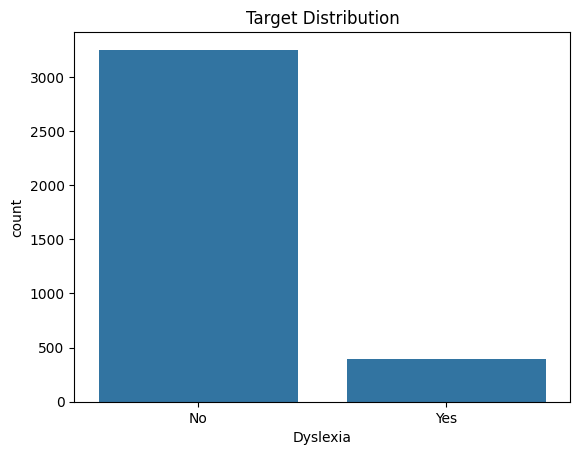


Tablet Target Distribution:
Dyslexia
No     89.390681
Yes    10.609319
Name: proportion, dtype: float64


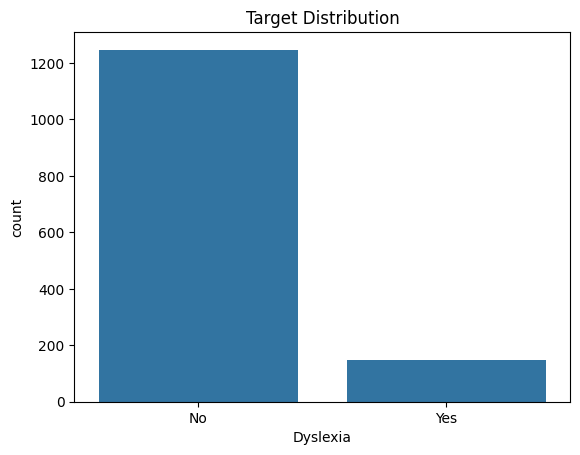

In [ ]:
# Checking output label imbalance
target_column = "Dyslexia"

print("Desktop Target Distribution:")
print(f"{df_desktop[target_column].value_counts(normalize=True) * 100}")
sns.countplot(x=df_desktop[target_column])
plt.title("Target Distribution")
plt.show()
print()
print("Tablet Target Distribution:")
print(f"{df_tablet[target_column].value_counts(normalize=True) * 100}")
sns.countplot(x=df_tablet[target_column])
plt.title("Target Distribution")
plt.show()

Clearly, there is a huge imbalance in the positive and negative classes.

Stratified KFold to be used.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_desktop.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"Encoding column: {col}")
    le = LabelEncoder()
    df_desktop[col] = le.fit_transform(df_desktop[col])
df_desktop

Encoding column: Gender
Encoding column: Nativelang
Encoding column: Otherlang
Encoding column: Dyslexia


,Gender,Nativelang,Otherlang,Age,Clicks1,Hits1,Misses1,Score1,Accuracy1,Missrate1,Clicks2,Hits2,Misses2,Score2,Accuracy2,Missrate2,Clicks3,Hits3,Misses3,Score3,Accuracy3,Missrate3,Clicks4,Hits4,Misses4,Score4,Accuracy4,Missrate4,Clicks5,Hits5,Misses5,Score5,Accuracy5,Missrate5,Clicks6,Hits6,Misses6,Score6,Accuracy6,Missrate6,...,Score26,Accuracy26,Missrate26,Clicks27,Hits27,Misses27,Score27,Accuracy27,Missrate27,Clicks28,Hits28,Misses28,Score28,Accuracy28,Missrate28,Clicks29,Hits29,Misses29,Score29,Accuracy29,Missrate29,Clicks30,Hits30,Misses30,Score30,Accuracy30,Missrate30,Clicks31,Hits31,Misses31,Score31,Accuracy31,Missrate31,Clicks32,Hits32,Misses32,Score32,Accuracy32,Missrate32,Dyslexia
0,1,0,1,7,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,2,2,0,2,1.0,0.0,3,3,0,3,1.0,0.0,4,1,3,1,0.25,0.75,...,3,0.600000,0.400000,9,1,1,1,0.111111,0.111111,6,2,0,2,0.333333,0.000000,4,1,1,1,0.25,0.25,14,1,2,1,0.071429,0.142857,18,0,0,0,0.000000,0.00,17,2,0,2,0.117647,0.000000,0
1,0,1,1,13,12,12,0,12,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,5,5,0,5,1.00,0.00,...,8,0.666667,0.333333,16,2,1,2,125.000000,0.062500,9,2,1,2,0.222222,0.111111,5,0,2,0,0.00,0.40,17,2,2,2,0.117647,0.117647,35,4,0,4,0.114286,0.00,26,2,2,2,0.076923,0.076923,1
2,0,0,1,7,6,6,0,6,1.0,0.0,6,6,0,6,1.00,0.00,6,6,0,6,1.0,0.0,3,3,0,3,1.0,0.0,4,4,0,4,1.0,0.0,2,2,0,2,1.00,0.00,...,2,0.400000,0.600000,17,2,1,2,0.117647,0.058824,13,3,1,3,0.230769,0.076923,5,0,2,0,0.00,0.40,17,1,3,1,0.058824,0.176471,35,4,0,4,0.114286,0.00,26,1,3,1,0.038462,0.115385,0
3,0,0,1,7,0,0,0,0,0.0,0.0,0,0,0,0,0.00,0.00,1,1,0,1,1.0,0.0,0,0,0,0,0.0,0.0,2,1,1,1,0.5,0.5,0,0,0,0,0.00,0.00,...,2,1.000000,0.000000,4,0,0,0,0.000000,0.000000,6,2,0,2,0.333333,0.000000,1,0,1,0,0.00,1.00,8,0,1,0,0.000000,125.000000,4,0,0,0,0.000000,0.00,1,0,0,0,0.000000,0.000000,0
4,0,0,1,8,4,4,0,4,1.0,0.0,8,8,0,8,1.00,0.00,5,5,0,5,1.0,0.0,5,2,3,2,0.4,0.6,4,4,0,4,1.0,0.0,5,3,2,3,0.60,0.40,...,6,0.666667,0.333333,15,1,2,1,0.066667,0.133333,13,4,0,4,0.307692,0.000000,4,1,1,1,0.25,0.25,17,0,4,0,0.000000,0.235294,40,1,2,1,25.000000,0.05,26,2,2,2,0.076923,0.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3639,1,0,0,10,7,7,0,7,1.0,0.0,6,5,1,5,0.83,0.17,5,5,0,5,1.0,0.0,4,4,0,4,1.0,0.0,5,5,0,5,1.0,0.0,1,0,1,0,0.00,1.00,...,2,1.000000,0.000000,2,2,0,2,1.000000,0.000000,2,2,0,2,1.000000,0.000000,2,0,2,0,0.00,1.00,4,0,4,0,0.000000,1.000000,3,2,1,2,0.670000,0.33,4,1,3,1,0.250000,0.750000,1
3640,0,0,1,15,9,9,0,9,1.0,0.0,11,11,0,11,1.00,0.00,10,10,0,10,1.0,0.0,5,5,0,5,1.0,0.0,7,7,0,7,1.0,0.0,8,8,0,8,1.00,0.00,...,2,0.290000,0.710000,4,1,3,1,0.250000,0.750000,5,5,0,5,1.000000,0.000000,2,0,2,0,0.00,1.00,4,2,2,2,0.500000,0.500000,4,3,1,3,0.750000,0.25,4,2,2,2,0.500000,0.500000,0
3641,0,0,1,15,11,11,0,11,1.0,0.0,10,10,0,10,1.00,0.00,6,6,0,6,1.0,0.0,0,0,0,0,0.0,0.0,6,6,0,6,1.0,0.0,2,2,0,2,1.00,0.00,...,11,0.790000,0.210000,4,2,2,2,0.500000,0.500000,3,3,0,3,1.000000,0.000000,2,1,1,1,0.50,0.50,4,0,4,0,0.000000,1.000000,5,3,2,3,0.600000,0.40,4,2,2,2,0.500000,0.500000,0
3642,0,0,1,15,10,10,0,10,1.0,0.0,5,5,0,5,1.00,0.00,6,6,0,6,1.0,0.0,5,0,5,0,0.0,1.0,6,6,0,6,1.0,0.0,8,1,7,1,0.13,0.88,...,2,0.250000,0.750000,4,2,2,2,0.500000,0.500000,5,4,1,4,0.800000,0.200000,2,0,2,0,0.00,1.00,4,3,1,3,0.750000,0.250000,4,3,1,3,0.750000,0.25,4,3,1,3,0.750000,0.250000,0


In [ ]:
duplicates = df_desktop.duplicated().sum()
print(f"Number of Duplicate Samples: {duplicates}")
if duplicates > 0:
    print("Dropping Duplicates...")
    df_desktop.drop_duplicates(inplace=True)
    print("Duplicates Dropped.")
else:
    print("No Duplicate Samples Found.")

Number of Duplicate Samples: 0
No Duplicate Samples Found.


In [ ]:
X = df_desktop.drop("Dyslexia",axis=1)
y = df_desktop['Dyslexia']

# **PLOS One Paper "Predicting risk of dyslexia with an online gamified test" Model Replication**

In [ ]:
scores_paper_accuracy = []
scores_paper_precision = []
scores_paper_recall = []
scores_paper_f1 = []

y_true_all = []
y_pred_paper_all = []

model = RandomForestClassifier(n_estimators=200, max_depth = 20, max_features = 14, class_weight='balanced', random_state=42)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for train_index, test_index in skf.split(X, y):
        # Splitting data into training and testing sets
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Scaling the input datasets
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # Training the model
        model.fit(X_train, y_train)
        # Get predicted probabilities
        probabilities = model.predict_proba(X_test)

        # Applying a custom threshold
        custom_threshold = 0.24
        y_pred_custom = (probabilities[:, 1] >= custom_threshold).astype(int)

        # Appending true and predicted labels for aggregation
        y_true_all.extend(y_test)
        y_pred_paper_all.extend(y_pred_custom)

        print(f"Fold: {len(scores_paper_accuracy) + 1}")
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred_custom))
        print("\n")

        # Calculate metrics
        scores_paper_accuracy.append(accuracy_score(y_test, y_pred_custom))
        scores_paper_precision.append(precision_score(y_test, y_pred_custom, average='weighted'))
        scores_paper_recall.append(recall_score(y_test, y_pred_custom, average='weighted'))
        scores_paper_f1.append(f1_score(y_test, y_pred_custom, average='weighted'))

Fold: 1
Confusion Matrix:
[[305  21]
 [ 24  15]]


Fold: 2
Confusion Matrix:
[[310  16]
 [ 14  25]]


Fold: 3
Confusion Matrix:
[[306  19]
 [ 17  23]]


Fold: 4
Confusion Matrix:
[[306  19]
 [ 16  24]]


Fold: 5
Confusion Matrix:
[[307  18]
 [ 20  19]]


Fold: 6
Confusion Matrix:
[[305  20]
 [ 22  17]]


Fold: 7
Confusion Matrix:
[[313  12]
 [ 20  19]]


Fold: 8
Confusion Matrix:
[[311  14]
 [ 25  14]]


Fold: 9
Confusion Matrix:
[[306  19]
 [ 18  21]]


Fold: 10
Confusion Matrix:
[[311  14]
 [ 21  18]]




In [ ]:
# Print the results
print(f"Model Accuracy: {np.mean(scores_paper_accuracy):.4f}")
print(f"Model Precision: {np.mean(scores_paper_precision):.4f}")
print(f"Model Recall: {np.mean(scores_paper_recall):.4f}")
print(f"Model F1-Score: {np.mean(scores_paper_f1):.4f}")

Model Accuracy: 0.8987
Model Precision: 0.8959
Model Recall: 0.8987
Model F1-Score: 0.8970


In [ ]:
cm_aggregated = confusion_matrix(y_true_all, y_pred_paper_all)
print("Aggregated Confusion Matrix:\n", cm_aggregated)

Aggregated Confusion Matrix:
 [[3080  172]
 [ 197  195]]


In [ ]:
# Calculate class-wise metrics
classes = np.unique(y)  # List of unique class labels

for i, class_label in enumerate(classes):
    TP = cm_aggregated[i, i]  # True positives for class i
    FP = cm_aggregated[:, i].sum() - TP  # False positives for class i
    FN = cm_aggregated[i, :].sum() - TP  # False negatives for class i

    # Calculate precision, recall, and F1 score for each class
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    # Print the metrics for each class
    print(f"Class {class_label}:")
    print(f"  Precision: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1 Score: {f1:.2f}")
    print("-" * 40)

Class 0:
  Precision: 0.94
  Recall: 0.95
  F1 Score: 0.94
----------------------------------------
Class 1:
  Precision: 0.53
  Recall: 0.50
  F1 Score: 0.51
----------------------------------------


# **Self-Model Implementation**

## **Individual Model Comparison**

In [79]:
classes, samples_in_class = np.unique(y, return_counts=True)
n_classes = len(classes)
total_samples = len(y)
class_weights = [total_samples / (n_classes * count) for count in samples_in_class]
class_weights_dict = {i: class_weights[i] for i in range(n_classes)}

negative_samples = samples_in_class[0]  # Count of class 0
positive_samples = samples_in_class[1]  # Count of class 1

scale_pos_weight = negative_samples / positive_samples

### **Finding Best k-Value for KNN**

In [ ]:
# Finding the best k value for KNN

neighbors_range = list(range(1, 101))

mean_accuracies = []
mean_precisions = []
mean_recalls = []
mean_f1s = []

for k_neighbors in neighbors_range:
    KNN = KNeighborsClassifier(n_neighbors=k_neighbors, metric='minkowski', p=1)
    scores_accuracy = []
    scores_precision = []
    scores_recall = []
    scores_f1 = []

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        KNN.fit(X_train, y_train)
        y_pred = KNN.predict(X_test)

        scores_accuracy.append(accuracy_score(y_test, y_pred))
        scores_precision.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
        scores_recall.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
        scores_f1.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    
    mean_accuracies.append(np.mean(scores_accuracy))
    mean_precisions.append(np.mean(scores_precision))
    mean_recalls.append(np.mean(scores_recall))
    mean_f1s.append(np.mean(scores_f1))

best_k_acc = neighbors_range[np.argmax(mean_accuracies)]
best_k_prec = neighbors_range[np.argmax(mean_precisions)]
best_k_recall = neighbors_range[np.argmax(mean_recalls)]
best_k_f1 = neighbors_range[np.argmax(mean_f1s)]

plt.figure(figsize=(15, 6))
plt.plot(neighbors_range[:len(mean_accuracies)], [val + 0.001 for val in mean_recalls], label='Accuracy', marker='o')
plt.plot(neighbors_range[:len(mean_precisions)], mean_precisions, label='Precision', marker='o')
plt.plot(neighbors_range[:len(mean_recalls)], mean_recalls, label='Recall', marker='o')
plt.plot(neighbors_range[:len(mean_f1s)], mean_f1s, label='F1 Score', marker='o')

plt.scatter(best_k_acc, mean_accuracies[best_k_acc - 1], color='blue', s=100, edgecolor='black', label=f'Best Accuracy (k={best_k_acc})')
plt.annotate(f"({best_k_acc}, {mean_accuracies[best_k_acc - 1]:.2f})",
             (best_k_acc, mean_accuracies[best_k_acc - 1]),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(best_k_prec, mean_precisions[best_k_prec - 1], color='orange', s=100, edgecolor='black', label=f'Best Precision (k={best_k_prec})')
plt.annotate(f"({best_k_prec}, {mean_precisions[best_k_prec - 1]:.2f})",
             (best_k_prec, mean_precisions[best_k_prec - 1]),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(best_k_recall, mean_recalls[best_k_recall - 1], color='green', s=100, edgecolor='black', label=f'Best Recall (k={best_k_recall})')
plt.annotate(f"({best_k_recall}, {mean_recalls[best_k_recall - 1]:.2f})",
             (best_k_recall, mean_recalls[best_k_recall - 1]),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.scatter(best_k_f1, mean_f1s[best_k_f1 - 1], color='red', s=100, edgecolor='black', label=f'Best F1 (k={best_k_f1})')
plt.annotate(f"({best_k_f1}, {mean_f1s[best_k_f1 - 1]:.2f})",
             (best_k_f1, mean_f1s[best_k_f1 - 1]),
             textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN Performance Metrics vs Number of Neighbors')
plt.xticks(np.arange(1, 101, 5))
plt.legend()
plt.grid(True)
plt.show() 

**Metrics vs k-Values (Euclidean Distance) Plot**

<img src="../Plots & Visuals/euclidean.png" alt="Metrics vs k-Values (Euclidean Distance)" style="width: 1000px; height: 450px"/>

**Metrics vs k-Values (Manhattan Distance) Plot**

<img src="../Plots & Visuals/manhattan.png" alt="Metrics vs k-Values (Manhattan Distance)" style="width: 1000px; height: 450px"/>

### **Models Comparison**

In [98]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth = 20, max_features = 20, class_weight='balanced', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10_000, class_weight='balanced', random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', class_weight='balanced', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=1),
    "Gradient Boosting": HistGradientBoostingClassifier(class_weight=class_weights_dict, random_state=42),
    "Bagging Classifier": BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42),
    "XGBoost Classifier": XGBClassifier(verbosity=0, scale_pos_weight=scale_pos_weight, random_state=42),
    "CatBoost Classifier": CatBoostClassifier(verbose=0, class_weights = class_weights, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), random_state=42),
}

y_true_all = {model_name: [] for model_name in models.keys()}
y_pred_all = {model_name: [] for model_name in models.keys()}

for model_name, model in models.items():
  scores_accuracy = []
  scores_precision = []
  scores_recall = []
  scores_f1 = []

  skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
  for train_index, test_index in skf.split(X, y):
          # Splitting data into training and testing sets
          X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]

          # Scaling the input datasets
          scaler = StandardScaler()
          X_train = scaler.fit_transform(X_train)
          X_test = scaler.transform(X_test)

          # Training the model
          model.fit(X_train, y_train)

          if model_name == "Random Forest":
            # Predict probabilities for Random Forest
            y_prob = model.predict_proba(X_test)
            y_pred = (y_prob[:, 1] >= 0.24).astype(int)

          else:
              # Predicting on the test set
              y_pred = model.predict(X_test)

          # Append true and predicted labels for aggregation
          y_true_all[model_name].extend(y_test)
          y_pred_all[model_name].extend(y_pred)

          # Calculate metrics
          scores_accuracy.append(accuracy_score(y_test, y_pred))
          scores_precision.append(precision_score(y_test, y_pred, average='weighted'))
          scores_recall.append(recall_score(y_test, y_pred, average='weighted'))
          scores_f1.append(f1_score(y_test, y_pred, average='weighted'))

  # Print the results
  print(f"{model_name} Accuracy: {np.mean(scores_accuracy):.4f}")
  print(f"{model_name} Precision: {np.mean(scores_precision):.4f}")
  print(f"{model_name} Recall: {np.mean(scores_recall):.4f}")
  print(f"{model_name} F1-Score: {np.mean(scores_f1):.4f}")
  print("\n")

Random Forest Accuracy: 0.8946
Random Forest Precision: 0.8966
Random Forest Recall: 0.8946
Random Forest F1-Score: 0.8952


Logistic Regression Accuracy: 0.8008
Logistic Regression Precision: 0.8937
Logistic Regression Recall: 0.8008
Logistic Regression F1-Score: 0.8319


Support Vector Machine Accuracy: 0.8466
Support Vector Machine Precision: 0.8952
Support Vector Machine Recall: 0.8466
Support Vector Machine F1-Score: 0.8644


KNN Accuracy: 0.8985
KNN Precision: 0.8743
KNN Recall: 0.8985
KNN F1-Score: 0.8698


Gradient Boosting Accuracy: 0.9081
Gradient Boosting Precision: 0.9033
Gradient Boosting Recall: 0.9081
Gradient Boosting F1-Score: 0.9045


Bagging Classifier Accuracy: 0.8963
Bagging Classifier Precision: 0.8723
Bagging Classifier Recall: 0.8963
Bagging Classifier F1-Score: 0.8733


XGBoost Classifier Accuracy: 0.9081
XGBoost Classifier Precision: 0.8974
XGBoost Classifier Recall: 0.9081
XGBoost Classifier F1-Score: 0.8997


CatBoost Classifier Accuracy: 0.9045
CatBoost Cla

In [99]:
for model_name, model in models.items():
  cm_aggregated = confusion_matrix(y_true_all[model_name], y_pred_all[model_name])
  print(f"{model_name} Confusion Matrix:\n", cm_aggregated)
  print("\n")

  # Calculate class-wise metrics
  classes = np.unique(y)  # List of unique class labels

  for i, class_label in enumerate(classes):
      TP = cm_aggregated[i, i]  # True positives for class i
      FP = cm_aggregated[:, i].sum() - TP  # False positives for class i
      FN = cm_aggregated[i, :].sum() - TP  # False negatives for class i

      # Calculate precision, recall, and F1 score for each class
      precision = TP / (TP + FP) if (TP + FP) != 0 else 0
      recall = TP / (TP + FN) if (TP + FN) != 0 else 0
      f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

      # Print the metrics for each class
      print(f"Class {class_label}:")
      print(f"  Precision: {precision:.4f}")
      print(f"  Recall: {recall:.4f}")
      print(f"  F1 Score: {f1:.4f}")
      print("-" * 40)
  print("\n")

Random Forest Confusion Matrix:
 [[3053  199]
 [ 185  207]]


Class 0:
  Precision: 0.9429
  Recall: 0.9388
  F1 Score: 0.9408
----------------------------------------
Class 1:
  Precision: 0.5099
  Recall: 0.5281
  F1 Score: 0.5188
----------------------------------------


Logistic Regression Confusion Matrix:
 [[2627  625]
 [ 101  291]]


Class 0:
  Precision: 0.9630
  Recall: 0.8078
  F1 Score: 0.8786
----------------------------------------
Class 1:
  Precision: 0.3177
  Recall: 0.7423
  F1 Score: 0.4450
----------------------------------------


Support Vector Machine Confusion Matrix:
 [[2820  432]
 [ 127  265]]


Class 0:
  Precision: 0.9569
  Recall: 0.8672
  F1 Score: 0.9098
----------------------------------------
Class 1:
  Precision: 0.3802
  Recall: 0.6760
  F1 Score: 0.4867
----------------------------------------


KNN Confusion Matrix:
 [[3214   38]
 [ 332   60]]


Class 0:
  Precision: 0.9064
  Recall: 0.9883
  F1 Score: 0.9456
----------------------------------------